# Домашнее задание к занятию «Тематическое моделирование»

Подгружаем библиотеки и данные

In [144]:
import json

import bz2
import regex
from tqdm import tqdm
from scipy import sparse
import re

In [145]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [146]:
responses = []
with bz2.BZ2File('banki_responses.json.bz2', 'r') as thefile:
    for row in tqdm(thefile):
        resp = json.loads(row)
        if not resp['rating_not_checked'] and (len(resp['text'].split()) > 0):
            responses.append(resp)

201030it [01:48, 1844.73it/s]


In [147]:
# Посмотрим на количество отзывов

len(responses)

153499

In [5]:
cities = []
banks = []
for item in responses:
    cities.append(item['city'])
    banks.append(item['bank_name'])
    

Загрузим библиотеки для токенизации и исключения стол слов

In [4]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vandal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import re
from nltk.corpus import stopwords

### Часть 1. Анализ текстов

1. Посчитайте количество отзывов в разных городах и на разные банки

Уберем из городов лишние символы, названия улиц, постараемся привести к более менее единному виду

In [16]:
result_cities = []

for city in cities:
    finaly_city = str(city).lower()
    finaly_city = finaly_city.replace('г. ', '')
    finaly_city = re.sub(r'(\s)(\()([а-я0-9\-,./\s]*)(\))', r'', finaly_city)
    finaly_city = re.sub(r'(,)(.+)', r'', finaly_city)
    finaly_city = re.sub(r'(\s)([[а-я0-9]{1})(\s)', r'', finaly_city)
    finaly_city = finaly_city.replace('-', ' ').replace('=', ' ')
    result_cities.append(finaly_city)

In [17]:
dict_cities = {}

for city in set(result_cities):
    dict_cities[city] = 0

In [18]:
for city in result_cities:
    dict_cities[city] += 1

In [19]:
city_df = pd.DataFrame()
city_df['city'] = dict_cities.keys()
city_df['count_response'] = dict_cities.values()
city_df = city_df.sort_values(by='count_response', ascending=False)

Выведем датафрейм с количеством отзывов по городам

In [20]:
city_df

,city,count_response
1588,москва,57026
341,none,15174
1051,санкт петербург,14928
1066,екатеринбург,2389
3115,новосибирск,2387
...,...,...
1764,москвалобня,1
1765,г.бронницы московская обл.,1
1766,александров владимирская область,1
390,новопавловск,1


Тоже самое сделаем для банков

In [21]:
dict_bank = {}

for bank in set(banks):
    dict_bank[bank] = 0

In [22]:
for bank in banks:
    dict_bank[bank] += 1

In [23]:
bank_df = pd.DataFrame()
bank_df['bank'] = dict_bank.keys()
bank_df['count_response'] = dict_bank.values()
bank_df = bank_df.sort_values(by='count_response', ascending=False)

Выведем датафрейм с количеством отзывов по банкам

In [24]:
bank_df

,bank,count_response
273,Сбербанк России,26327
66,Альфа-Банк,10224
359,ВТБ 24,8185
129,Русский Стандарт,7943
272,Хоум Кредит Банк,7549
...,...,...
264,Кошелев-Банк,1
77,Кор,1
464,Развитие,1
9,БайкалИнвестБанк,1


2. Постройте гистограмы длин слов в символах и в словах

In [148]:
from tqdm import tqdm

len_response = []
sim_response = []
list_bow = []


i = 0

# Уберем лишние символы в отзывах и токенизируем посчитаем количество токенов в каждом отзыве и символов

for item in tqdm(responses):
    response = item['text'].lower()
    words = re.sub(r'[,.\(\):!;\"\"?]', r'', response)
    response_simbol = re.sub(r'\s', r'', response) # Уберем пробелы для подсчета символов
    word_response = list(nltk.word_tokenize(words))
    list_bow.append(word_response)
    len_response.append(len(word_response)) # Количество слов в отзывах
    sim_response.append(len(response_simbol)) # Количество символов в отзывах
    

100%|██████████| 153499/153499 [02:55<00:00, 873.05it/s] 


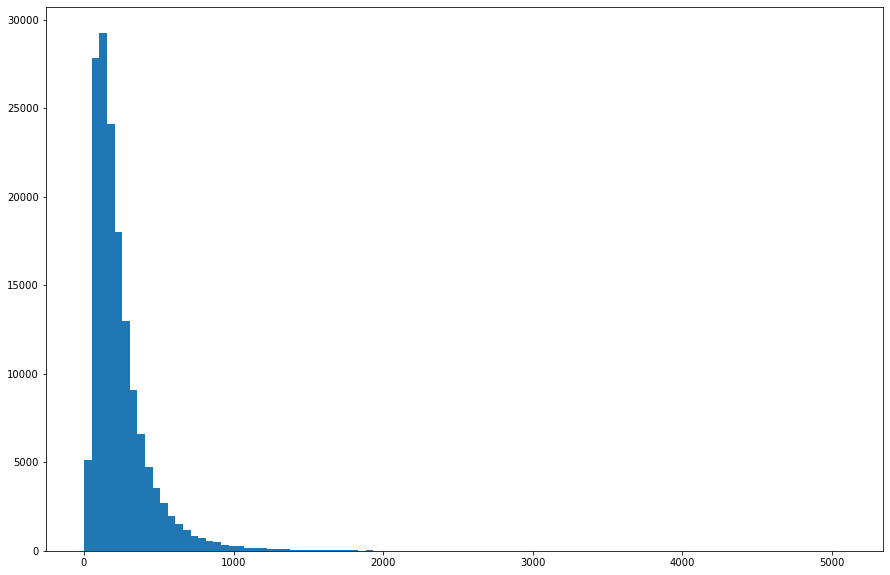

In [149]:
# Собственно получаем гистограмму распределения количества слов в отзывах

plt.figure(figsize=(15,10))
plt.hist(len_response, 100)
plt.show()

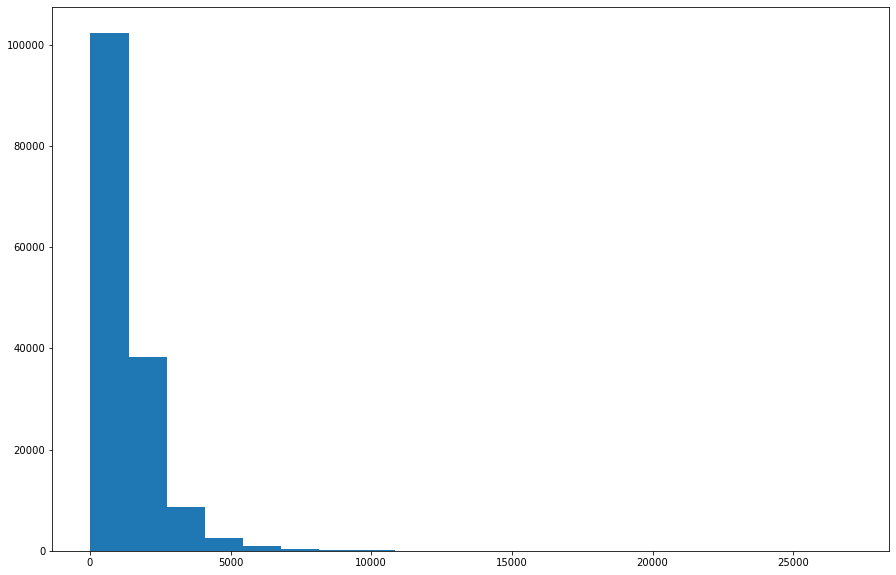

In [150]:
# Собственно получаем гистограмму распределения количества слов в отзывах

plt.figure(figsize=(15,10))
plt.hist(sim_response, 20)
plt.show()

3. Найдите 10 самых частых:
    * слов
    * слов без стоп-слов
    * лемм
    * существительных


In [28]:
# Соберем мешок всех слов в отзывах

bow = []

for item in tqdm(list_bow):
    bow += item

100%|██████████| 153499/153499 [00:03<00:00, 39699.01it/s]


In [29]:
# Посчитаем их количество

from collections import Counter

cnt_words = Counter(bow)

cnt_words

Counter({'добрый': 18543,
         'день': 75929,
         'я': 575297,
         'не': 851609,
         'являюсь': 19687,
         'клиентом': 25932,
         'банка': 263779,
         'и': 1054393,
         'поручителем': 982,
         'по': 365099,
         'кредитному': 3064,
         'договору': 7695,
         'а': 223800,
         'также': 30455,
         'каким-либо': 281,
         'другим': 3962,
         'лицом': 1533,
         'письменно': 1217,
         'оформившим': 13,
         'отношения': 6807,
         'с': 454944,
         'банком': 37769,
         'поводу': 10147,
         'урегулирования': 622,
         'чьей-либо': 10,
         'задолженности': 14936,
         'начиная': 1898,
         'марта': 10294,
         '2015': 3519,
         'года': 55380,
         'начали': 4827,
         'приходить': 3805,
         'бесконечные': 319,
         'письма': 5369,
         'из': 92371,
         'ооо': 4955,
         'примо': 2,
         'коллектна': 1,
         'мой': 49290,
   

In [30]:
# Выведем датафрейм всех 10 самых популярных слов

words_df = pd.DataFrame()
words_df['word'] = cnt_words.keys()
words_df['count'] = cnt_words.values()

words_df = words_df.sort_values(by='count', ascending=False)
words_df.head(10)

,word,count
53,в,1322777
7,и,1054393
3,не,851609
98,на,704423
78,что,620871
2,я,575297
20,с,454944
9,по,365099
84,мне,320616
191,-,296355


In [32]:
# Удалим стоп слова

clean_bow = []

for word in tqdm(bow):
    if word not in stopwords.words('russian'):
        clean_bow.append(word)

100%|██████████| 36591518/36591518 [1:17:56<00:00, 7824.17it/s]  


In [33]:
# Посчитаем количество слов без стоп слов

cnt_words = Counter(clean_bow)

cnt_words

Counter({'добрый': 18543,
         'день': 75929,
         'являюсь': 19687,
         'клиентом': 25932,
         'банка': 263779,
         'поручителем': 982,
         'кредитному': 3064,
         'договору': 7695,
         'также': 30455,
         'каким-либо': 281,
         'другим': 3962,
         'лицом': 1533,
         'письменно': 1217,
         'оформившим': 13,
         'отношения': 6807,
         'банком': 37769,
         'поводу': 10147,
         'урегулирования': 622,
         'чьей-либо': 10,
         'задолженности': 14936,
         'начиная': 1898,
         'марта': 10294,
         '2015': 3519,
         'года': 55380,
         'начали': 4827,
         'приходить': 3805,
         'бесконечные': 319,
         'письма': 5369,
         'ооо': 4955,
         'примо': 2,
         'коллектна': 1,
         'адрес': 11642,
         'город': 2976,
         'москва': 5979,
         'уваровский': 1,
         'переулок': 248,
         'дом': 2478,
         '10': 30775,
         'ква

In [34]:
# Выведем датафрейм с 10 самыми популярными словами без стоп слов

clean_words_df = pd.DataFrame()
clean_words_df['word'] = cnt_words.keys()
clean_words_df['count'] = cnt_words.values()

clean_words_df = clean_words_df.sort_values(by='count', ascending=False)
clean_words_df.head(10)

,word,count
165,-,296355
4,банка,263779
121,банк,196165
298,это,182975
423,деньги,130005
159,карту,104901
143,карты,100843
320,кредит,80209
1,день,75929
127,заявление,69487


In [6]:
# Загрузим библиотеку для лемматизации и морфолигического анализа

import pymorphy2

m = pymorphy2.MorphAnalyzer()

In [36]:
# Посчитаем количество лемм и количество существительных

lemm_list = []
noun_list = []

# Лемматизиурем каждое слово и получим существительные - запишем леммы в один список, существительные в другой

for word in tqdm(clean_words_df['word']):
    word_info = m.parse(word)[0]   
    lemma = word_info.normal_form
    chast_rechi = str(word_info.tag.cyr_repr).split(',')[0]
    lemm_list.append(lemma)
    if chast_rechi == 'СУЩ':
        noun_list.append(lemma)

100%|██████████| 459842/459842 [01:34<00:00, 4888.09it/s]


In [37]:
# Посчитаем количество лемм и выведем 10 самых популярных

cnt_words = Counter(lemm_list)

lemma_df = pd.DataFrame()
lemma_df['lemma'] = cnt_words.keys()
lemma_df['count'] = cnt_words.values()

lemma_df = lemma_df.sort_values(by='count', ascending=False)
lemma_df.head(10)

,lemma,count
917,использовать,56
291,внести,56
1803,привести,55
892,выдавать,52
1313,принести,51
402,обещать,51
586,провести,51
1020,рекомендовать,50
1164,ожидать,50
1494,высокий,48


In [38]:
# Посчитаем количество существительных и выведем 10 самых популярных

cnt_words = Counter(noun_list)

noun_df = pd.DataFrame()
noun_df['noun'] = cnt_words.keys()
noun_df['count'] = cnt_words.values()

noun_df = noun_df.sort_values(by='count', ascending=False)
noun_df.head(10)

,noun,count
447,заёмщик,20
860,партнёр,20
494,расчёт,20
2371,банк-партнёр,20
629,отчёт,20
136,кол-центр,19
2699,полёт,19
1894,подсчёт,19
424,приём,18
101,тысяча,18


4. Постройте кривые Ципфа и Хипса

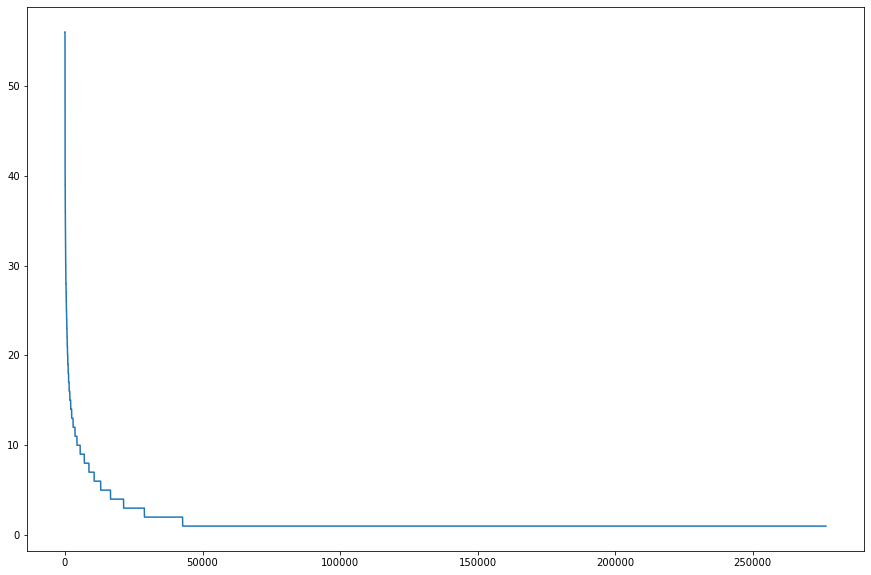

In [39]:
# Кривая Ципфа

plt.figure(figsize=(15,10))
plt.plot([x for x in range(len(lemma_df['count']))], lemma_df['count'])
plt.show()

In [40]:
cnt = Counter()
n_words = []
n_tokens = []

tokens = []

for item in tqdm(responses):
    response = item['text'].lower()
    response = re.sub(r'[,.\(\):!;\"\"?]', r'', response)
    tokens = nltk.word_tokenize(response)
    
    cnt.update([token for token in tokens])
    n_words.append(len(cnt))
    n_tokens.append(sum(list(cnt.values())))


100%|██████████| 153499/153499 [57:52<00:00, 44.21it/s]


In [41]:
df = pd.DataFrame({'n_words': n_words, 'n_tokens': n_tokens})
df

,n_words,n_tokens
0,165,219
1,257,358
2,306,447
3,376,569
4,521,875
...,...,...
153494,459986,36590443
153495,459987,36590554
153496,459992,36591341
153497,459993,36591443


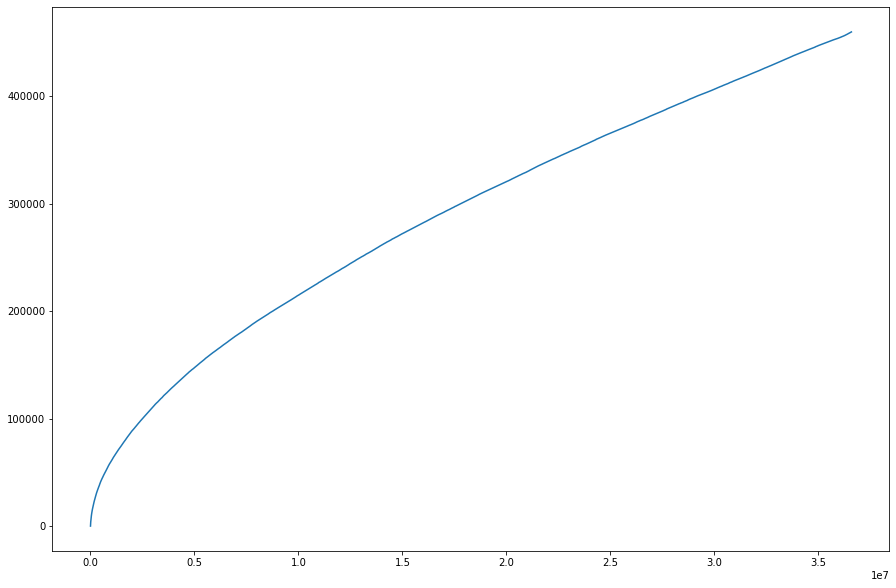

In [42]:
# Кривая Хипса

plt.figure(figsize=(15,10))
plt.plot(df['n_tokens'], df['n_words'])
plt.show()

5. Ответьте на следующие вопросы:
    * какое слово встречается чаще, "сотрудник" или "клиент"?
    * сколько раз встречается слова "мошенничество" и "доверие"?


In [43]:
# Количество упоминаний слова сотрудник

noun_df.loc[noun_df['noun'] == 'сотрудник']

,noun,count
19,сотрудник,10


In [44]:
# Количество упоминаний слова клиент

noun_df.loc[noun_df['noun'] == 'клиент']

,noun,count
25,клиент,10


Встречаются одинаковое количество раз

In [45]:
# Количество упоминаний слова мошенничество

noun_df.loc[noun_df['noun'] == 'мошенничество']

,noun,count
572,мошенничество,8


In [46]:
# Количество упоминаний слова доверие

noun_df.loc[noun_df['noun'] == 'доверие']

,noun,count
615,доверие,6


Мошенничество встречается чаще чем доверие

6. В поле "rating_grade" записана оценка отзыва по шкале от 1 до 5. Используйте меру , для того, чтобы найти ключевые слова и биграмы для положительных отзывов (с оценкой 5) и отрицательных отзывов (с оценкой 1)

In [7]:
# Функции для предобратки текстов отзывов

mystopwords = stopwords.words('russian')
ru_words = re.compile("[А-Яа-я]+")


def words_only(text):
    return " ".join(ru_words.findall(text))


def lemmatize(text):
    try:
        return  " ".join([m.parse(w)[0].normal_form for w in text.lower().split()])
    except:
        return " "


def remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""

    
def preprocess(text):
    return remove_stopwords(lemmatize(words_only(text.lower())))

In [9]:
# Сделаем датафрейм только с положительными и отрицательными отзывами

response = []
rating_grade = []

for item in tqdm(responses):
    rating_grade.append(item['rating_grade'])
    response.append(item['text'])
        
df_response = pd.DataFrame({'text': response, 'rating_grade': rating_grade})
result_df = df_response.loc[(df_response['rating_grade'] == 1) | (df_response['rating_grade'] == 5)]

In [ ]:
# Обработаем отзывы в этом датафрейме

from tqdm.notebook import tqdm
tqdm.pandas()

result_df.text = result_df.text.astype('str').progress_apply(preprocess)

result_df.to_csv('result_df.csv') # Сохраним на всякий случай результат в файл, если что-то пойдет дальше не так - эти данные пригодятся

In [4]:
result_df = pd.read_csv('result_df.csv')

In [5]:
# Датафрейм с положительными и негативными обработанными отзывами

result_df

,Unnamed: 0,text,rating_grade
0,19,открыть вклад счёт плюс зарплатный карта рубль...,1.0
1,33,добрый время вчера поступить смс уведомление б...,1.0
2,76,г около час прийти указанный офис намерение по...,1.0
3,85,оплата коммунальный платёж пользоваться пласти...,1.0
4,94,апрель это год прийти отделение сбербанк г чап...,1.0
...,...,...,...
62095,153493,оформить банк кредитный карта январь г первый ...,1.0
62096,153494,слишком большой банк учитывать наш специфика п...,5.0
62097,153496,уважаемый руководство банк овк проживать г ива...,1.0
62098,153497,пробовать оформить товар кредит альфа банк ком...,1.0


In [10]:
# Обработаем все отзывы (знаю что можно было сделать это сразу - но не смотрел дальше собственного носа на общую картину)

from tqdm.notebook import tqdm
tqdm.pandas()

df_response.text = df_response.text.astype('str').progress_apply(preprocess)
df_response.to_csv('df_response.csv') # Сохраним все обработанные отзывы на всякий случай

/Users/vandal/anaconda3/lib/python3.8/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [6]:
df_response = pd.read_csv('df_response.csv')

In [7]:
# Датафрейм со всеми обработанными отзывами

df_response

,Unnamed: 0,text,rating_grade
0,0,добрый день являться клиент банк поручитель кр...,NaN
1,1,добрый день являться держатель зарплатный карт...,NaN
2,2,здравствуйте дублировать заявление можайский д...,NaN
3,3,добрый день открыть расчётный счёт сбербанк юр...,NaN
4,4,г взять кредит ваш банк заявить сумма рубль го...,NaN
...,...,...,...
153494,153494,слишком большой банк учитывать специфика проду...,5.0
153495,153495,виноватый проблема кроме предпоследний сообщен...,3.0
153496,153496,уважаемый руководство банк овк проживать г ива...,1.0
153497,153497,пробовать оформить товар кредит альфа банк ком...,1.0


In [12]:
# Получим получим все леммы в один список из плохих отзывов

from tqdm.notebook import tqdm
tqdm.pandas()

token_list = []

for line in tqdm(result_df.loc[result_df.rating_grade == 1]['text']):
        token_list += str(line).split(' ')

/Users/vandal/anaconda3/lib/python3.8/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [16]:
# Посчитаем количество каждой леммы в плохих отзывах

from collections import Counter

cnt_bad_lemma = Counter(token_list)

cnt_bad_lemma

Counter({'открыть': 9797,
         'вклад': 21954,
         'счёт': 49442,
         'плюс': 1819,
         'зарплатный': 4565,
         'карта': 116026,
         'рубль': 21875,
         'сегодня': 16530,
         'прийти': 21562,
         'указанный': 4498,
         'отделение': 59572,
         'цель': 3294,
         'пополнить': 1968,
         'долларовый': 486,
         'сч': 5755,
         'дать': 26920,
         'операционист': 7326,
         'паспорт': 7974,
         'окошко': 1396,
         'написать': 26128,
         'приготовить': 69,
         'подтверждение': 2402,
         'операция': 16857,
         'подобный': 3564,
         'прошлый': 1760,
         'потребовать': 1192,
         'сказать': 47599,
         'нужно': 13477,
         'положить': 5432,
         'деньга': 69619,
         'вс': 9751,
         'взять': 11548,
         'делать': 11216,
         'крутило': 23,
         'вертел': 4,
         'вставить': 552,
         'терминал': 6666,
         'ввести': 2184,
      

In [28]:
# Посчитаем в скольких документах встречается каждая лемма

bad_count_doc_dict = {}

for lemma in tqdm(cnt_bad_lemma.keys()):
    count_doc = 0
    for line in df_response['text']:
        if str(lemma) in str(line):
            count_doc += 1
    
    bad_count_doc_dict[lemma] = count_doc
    

In [22]:
# Получим получим все леммы в один список из хороших отзывов

from tqdm.notebook import tqdm
tqdm.pandas()

token_list = []

for line in tqdm(result_df.loc[result_df.rating_grade == 5]['text']):
        token_list += str(line).split(' ')

/Users/vandal/anaconda3/lib/python3.8/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [23]:
# Посчитаем количество каждой леммы в хороших отзывах

from collections import Counter

cnt_good_lemma = Counter(token_list)

cnt_good_lemma

Counter({'досрочно': 655,
         'закрывать': 460,
         'вклад': 11614,
         'отпуск': 430,
         'жена': 825,
         'заказывать': 360,
         'заранее': 744,
         'забыть': 852,
         'заказать': 720,
         'сотрудник': 11788,
         'банк': 65331,
         'спб': 299,
         'ленсовет': 1,
         'наталья': 576,
         'отказать': 642,
         'хотя': 3030,
         'сумма': 6185,
         'значительный': 136,
         'работать': 6540,
         'быстро': 5833,
         'профессионально': 564,
         'лишний': 923,
         'жаль': 440,
         'прикрыть': 13,
         'приём': 343,
         'офис': 9733,
         'озерко': 16,
         'доступность': 110,
         'заметить': 712,
         'нести': 115,
         'деньга': 11691,
         'брать': 2239,
         'кредит': 13613,
         'желать': 921,
         'успех': 583,
         'хотеть': 6568,
         'открыть': 3925,
         'доходный': 96,
         'год': 10919,
         'процент': 44

In [24]:
# Посчитаем в скольких документах встречается каждая лемма

good_count_doc_dict = {}

for lemma in tqdm(cnt_good_lemma.keys()):
    count_doc = 0
    for line in df_response['text']:
        if str(lemma) in str(line):
            count_doc += 1
    
    good_count_doc_dict[lemma] = count_doc
    

In [31]:
# Посчитаем tfidf для каждой леммы из хороших отзывов

good_tfidf = {}

for lemma in good_count_doc_dict:
    if good_count_doc_dict[lemma] != 0:
        good_tfidf[lemma] = cnt_good_lemma[lemma]/good_count_doc_dict[lemma]
    
good_tfidf

{'досрочно': 0.10621047510945354,
 'закрывать': 0.07563301545544229,
 'вклад': 0.4516254471924094,
 'отпуск': 0.11832691249312052,
 'жена': 0.1924871675221652,
 'заказывать': 0.11680726800778715,
 'заранее': 0.10489214718736782,
 'забыть': 0.1209025117071094,
 'заказать': 0.11455847255369929,
 'сотрудник': 0.19214970333181197,
 'банк': 0.45118093922651936,
 'спб': 0.1266949152542373,
 'ленсовет': 0.041666666666666664,
 'наталья': 0.3516483516483517,
 'отказать': 0.03120898352049001,
 'хотя': 0.11273579640584887,
 'сумма': 0.12172561059613075,
 'значительный': 0.08478802992518704,
 'работать': 0.1547672574957995,
 'быстро': 0.43529850746268656,
 'профессионально': 0.5062836624775583,
 'лишний': 0.1673010694217872,
 'жаль': 0.12809315866084425,
 'прикрыть': 0.06074766355140187,
 'приём': 0.06930693069306931,
 'офис': 0.25182406209573094,
 'озерко': 0.26229508196721313,
 'доступность': 0.1996370235934664,
 'заметить': 0.12371850564726325,
 'нести': 0.004387973137973138,
 'деньга': 0.16679

In [34]:
# Посчитаем tfidf для каждой леммы из плохих отзывов

bad_tfidf = {}

for lemma in bad_count_doc_dict:
    if bad_count_doc_dict[lemma] != 0:
        bad_tfidf[lemma] = cnt_bad_lemma[lemma]/bad_count_doc_dict[lemma]
    
bad_tfidf


{'открыть': 0.474522910006781,
 'вклад': 0.8537097526831544,
 'счёт': 0.9042062911485004,
 'плюс': 0.22996207332490518,
 'зарплатный': 0.5135560805489932,
 'карта': 1.5495752978257387,
 'рубль': 0.7255871036221309,
 'сегодня': 0.433369163411373,
 'прийти': 0.4274019306626494,
 'указанный': 0.4176028223934639,
 'отделение': 0.9747206178313726,
 'цель': 0.4221994360420405,
 'пополнить': 0.40974391005621486,
 'долларовый': 0.45083487940630795,
 'сч': 0.07571272578968834,
 'дать': 0.2651250283148015,
 'операционист': 0.5029866117404738,
 'паспорт': 0.5726802642918701,
 'окошко': 0.6673040152963671,
 'написать': 0.6074160176682553,
 'приготовить': 0.15,
 'подтверждение': 0.39993339993339994,
 'операция': 0.6115585546364823,
 'подобный': 0.4110726643598616,
 'прошлый': 22.564102564102566,
 'потребовать': 0.2316812439261419,
 'сказать': 0.7074867343450408,
 'нужно': 0.5379180969106729,
 'положить': 0.354014598540146,
 'деньга': 0.9932800684833785,
 'вс': 0.08718705293276109,
 'взять': 0.45400

In [35]:
# Выведем данные в датафрейм
good_tfidf_df = pd.DataFrame({'lemma': good_tfidf.keys(), 'tfidf': good_tfidf.values()})

In [40]:
# Топ 10 ключевых слов по метрике tfidf для хороших отзывов
good_tfidf_df.sort_values(by='tfidf', ascending=False).head(10)

,lemma,tfidf
364,также,3099.000000
98,свой,38.701493
350,наш,32.163462
24538,прынцесс,11.000000
30124,маштакова,9.000000
27624,инобанка,8.000000
1266,прошлый,7.974359
12869,окзвый,6.000000
24226,джук,5.333333
12033,гудвилл,5.000000


In [38]:
# Тоже самое для плохих

bad_tfidf_df = pd.DataFrame({'lemma': bad_tfidf.keys(), 'tfidf': bad_tfidf.values()})

In [41]:
# Топ 10 ключевых слов по метрике tfidf для плохих отзывов

bad_tfidf_df.sort_values(by='tfidf', ascending=False).head(10)

,lemma,tfidf
95,также,10176.000000
349,свой,157.041045
571,наш,86.173077
49258,тыханский,40.000000
26912,упзфл,27.000000
24,прошлый,22.564103
42070,рыбанька,20.000000
14528,машинцев,12.000000
38964,чсд,12.000000
52928,тулиновый,11.000000


### Часть 2. Тематическое моделирование

In [42]:
# Подгрузим необходимые библиотеки

from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim import similarities

1. Постройте несколько тематических моделей коллекции документов с разным числом тем. Приведите примеры понятных (интерпретируемых) тем.

In [45]:
texts = [str(text).split() for text in df_response.text]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [46]:
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [49]:
# Моделирование на 10 тем

%%time
lsi = lsimodel.LsiModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=10)

CPU times: user 3min 25s, sys: 12.2 s, total: 3min 37s
Wall time: 2min 15s


In [51]:
lsi.show_topics(10)

[(0,
  '0.197*"карта" + 0.135*"кредит" + 0.117*"деньга" + 0.111*"заявление" + 0.109*"счёт" + 0.102*"вклад" + 0.102*"банкомат" + 0.102*"отделение" + 0.098*"сбербанк" + 0.098*"сумма"'),
 (1,
  '-0.421*"вклад" + 0.354*"кредит" + -0.188*"банкомат" + 0.162*"страховка" + 0.154*"платёж" + -0.154*"карта" + 0.149*"задолженность" + 0.140*"погашение" + -0.111*"очередь" + 0.111*"погасить"'),
 (2,
  '-0.479*"вклад" + 0.272*"банкомат" + 0.228*"карта" + 0.205*"сбербанк" + -0.158*"кредит" + 0.130*"заявление" + -0.130*"договор" + 0.129*"операция" + 0.120*"средство" + 0.119*"деньга"'),
 (3,
  '-0.275*"вклад" + -0.215*"сумма" + 0.202*"заявка" + 0.187*"номер" + -0.182*"руб" + -0.157*"платёж" + -0.157*"договор" + -0.154*"погашение" + -0.144*"рубль" + -0.143*"средство"'),
 (4,
  '-0.448*"карта" + 0.291*"банкомат" + -0.197*"лимит" + -0.187*"кредитный" + 0.168*"номер" + 0.126*"терминал" + 0.126*"звонок" + 0.122*"деньга" + 0.118*"купюра" + -0.115*"комиссия"'),
 (5,
  '-0.316*"банкомат" + 0.279*"вклад" + -0.254

In [52]:
# Моделирование на 7 тем

%%time
lsi = lsimodel.LsiModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=7)

CPU times: user 3min 18s, sys: 10.3 s, total: 3min 28s
Wall time: 2min 7s


In [53]:
lsi.show_topics(7)

[(0,
  '0.198*"карта" + 0.135*"кредит" + 0.116*"деньга" + 0.111*"заявление" + 0.108*"счёт" + 0.103*"вклад" + 0.102*"банкомат" + 0.102*"отделение" + 0.098*"сбербанк" + 0.098*"сумма"'),
 (1,
  '-0.465*"вклад" + 0.345*"кредит" + 0.164*"страховка" + 0.156*"платёж" + 0.148*"задолженность" + -0.141*"карта" + 0.140*"погашение" + -0.134*"банкомат" + -0.117*"открыть" + -0.117*"очередь"'),
 (2,
  '-0.438*"вклад" + 0.276*"карта" + 0.254*"банкомат" + 0.202*"сбербанк" + -0.197*"кредит" + -0.137*"договор" + 0.136*"операция" + -0.133*"страховка" + 0.123*"заявление" + 0.121*"средство"'),
 (3,
  '-0.296*"вклад" + 0.227*"заявка" + -0.209*"сумма" + -0.181*"руб" + 0.173*"номер" + -0.168*"платёж" + -0.160*"договор" + -0.155*"средство" + -0.149*"счёт" + -0.147*"погашение"'),
 (4,
  '0.293*"номер" + -0.288*"страховка" + 0.234*"вклад" + 0.222*"звонок" + -0.217*"карта" + -0.169*"заявка" + 0.160*"ваш" + 0.147*"телефон" + -0.141*"страхование" + -0.131*"кредит"'),
 (5,
  '0.288*"страховка" + 0.254*"сбербанк" + 0.

In [54]:
# Моделирование на 15 тем

%%time
lsi = lsimodel.LsiModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=15)

CPU times: user 3min 42s, sys: 11.7 s, total: 3min 54s
Wall time: 2min 20s


In [55]:
lsi.show_topics(15)

[(0,
  '0.197*"карта" + 0.135*"кредит" + 0.116*"деньга" + 0.111*"заявление" + 0.108*"счёт" + 0.103*"банкомат" + 0.102*"вклад" + 0.102*"отделение" + 0.098*"сбербанк" + 0.097*"сумма"'),
 (1,
  '-0.382*"вклад" + 0.360*"кредит" + -0.215*"банкомат" + -0.171*"карта" + 0.168*"страховка" + 0.147*"платёж" + 0.147*"задолженность" + 0.142*"погашение" + -0.121*"деньга" + 0.115*"звонок"'),
 (2,
  '-0.506*"вклад" + 0.273*"банкомат" + 0.216*"карта" + 0.184*"сбербанк" + 0.133*"заявление" + -0.128*"кредит" + 0.121*"операция" + -0.120*"договор" + 0.118*"средство" + 0.115*"деньга"'),
 (3,
  '-0.277*"вклад" + -0.218*"сумма" + -0.190*"руб" + 0.189*"номер" + 0.177*"заявка" + -0.158*"платёж" + -0.154*"договор" + -0.148*"погашение" + -0.147*"процент" + -0.147*"рубль"'),
 (4,
  '-0.351*"карта" + 0.277*"вклад" + 0.267*"номер" + -0.190*"страховка" + 0.190*"звонок" + -0.170*"лимит" + -0.158*"кредитный" + -0.146*"заявка" + 0.137*"телефон" + 0.135*"ваш"'),
 (5,
  '0.454*"банкомат" + -0.268*"карта" + -0.183*"вклад" 

Я обнаружил следующие темы:
* кредит, страховка, задолженность, погашение - отзывы о кредитах и их условиях
* справка, документ, счет - получение справок по счету
* звонок, вклад, телефон, номер, ваш - телефонные разговоры по поводу вкладов

и тп

2. Найдите темы, в которых упомянуты конкретные банки (Сбербанк, ВТБ, другой банк). Можете ли вы их прокомментировать / объяснить? Эта часть задания может быть сделана с использованием gensim.

В темах упоминается Сбербанк и Киви. По сбербанку есть темы: по страхованию http://joxi.ru/D2PEDlgIw9X3RA и кредитным картам. По Киви: блокировка киви кошелька http://joxi.ru/vAWM3dWh3eEbLm, платеж по кредиту через киви кошелек http://joxi.ru/Y2L4XblCxlG0W2

### Часть 3. Классификация текстов

In [56]:
# Подгрузим нужные библиотеки

from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [68]:
# Оставим только положительные и отрицательные отзывы

analyze_response = df_response.loc[(df_response.rating_grade == 1)|(df_response.rating_grade == 5)].drop(['Unnamed: 0'], axis=1)
analyze_response = analyze_response.dropna()

In [84]:
analyze_response

,text,rating_grade
19,открыть вклад счёт плюс зарплатный карта рубль...,1.0
33,добрый время вчера поступить смс уведомление б...,1.0
76,г около час прийти указанный офис намерение по...,1.0
85,оплата коммунальный платёж пользоваться пласти...,1.0
94,апрель год прийти отделение сбербанк г чапаевс...,1.0
...,...,...
153493,оформить банк кредитный карта январь г первый ...,1.0
153494,слишком большой банк учитывать специфика проду...,5.0
153496,уважаемый руководство банк овк проживать г ива...,1.0
153497,пробовать оформить товар кредит альфа банк ком...,1.0


Векторизуем использую Tfidf метрику по очереди по униграмма, биграммам и триграммам для каждой векторизации обучим модель логичестической регрессии и посмотрим на качество

In [110]:
Tfidf_vectors = TfidfVectorizer().fit_transform(analyze_response.text)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(Tfidf_vectors, analyze_response.rating_grade, test_size=0.2, random_state=47)


In [112]:
model = LogisticRegression()

model.fit(X_train, y_train)

/Users/vandal/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [113]:
y_pred = model.predict(X_test)

In [114]:
from sklearn.metrics import f1_score, accuracy_score

Результат при векторизации по униграммам

In [115]:
accuracy_score(y_test, y_pred)

0.96658615136876

In [116]:
f1_score(y_test, y_pred)

0.978332376129066

In [100]:
# Тоже самое по биграммам

Tfidf_vectors = TfidfVectorizer(ngram_range=(2, 2)).fit_transform(analyze_response.text)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(Tfidf_vectors, analyze_response.rating_grade, test_size=0.2, random_state=47)


In [103]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [104]:
y_pred = model.predict(X_test)

In [105]:
# Качество при векторизации по биграммам упало

print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.8907407407407407
0.9329313497751197


In [117]:
# Тоже самое по триграммам

Tfidf_vectors = TfidfVectorizer(ngram_range=(3, 3)).fit_transform(analyze_response.text)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(Tfidf_vectors, analyze_response.rating_grade, test_size=0.2, random_state=47)


In [119]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [120]:
y_pred = model.predict(X_test)

In [121]:
# Качество при векторизации по триграммам упало еще сильнее

print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.7636070853462158
0.8655431397691885


Попробуем векторизовать по символьным триграммам

In [124]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(analyzer='char', ngram_range=(3, 3))
bow = vec.fit_transform(analyze_response.text)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(bow, analyze_response.rating_grade, test_size=0.2, random_state=47)


In [126]:
model = LogisticRegression()

model.fit(X_train, y_train)

/Users/vandal/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [127]:
y_pred = model.predict(X_test)

In [128]:
# Качество намного лучше, но уступает первоначальным показателям при векторизации по униграммам

print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.952012882447665
0.9686117547925005


Попробуем использовать скрытые темы при классификации.\
Используем латентый семантический анализ

In [130]:
vectors = TfidfVectorizer().fit_transform(analyze_response.text)
X_reduced = TruncatedSVD(n_components=5, random_state=0).fit_transform(vectors)


In [131]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, analyze_response.rating_grade, test_size=0.2, random_state=47)


In [132]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [133]:
y_pred = model.predict(X_test)

In [134]:
# Качество очень сильно упало

print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.7981481481481482
0.8782477781555048


Используем тематические модели LDA

In [135]:
from sklearn.decomposition import LatentDirichletAllocation

In [138]:
lda = LatentDirichletAllocation(n_components=5, random_state=0)


X_reduced = lda.fit_transform(vectors)


In [139]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, analyze_response.rating_grade, test_size=0.2, random_state=47)


In [140]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [141]:
y_pred = model.predict(X_test)

In [142]:
# Качество существенно лучше чем при TSVD

print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9022544283413849
0.936479698618669


### Итого:
Учитывая, что при классификации с использованием LDA качество достаточно высокое, а при этом ресурсов и времени на обучение тратятся намного меньше - этот вариант возможно можно считать весьма неплохим. 
При классификации при векторизации по униграммам качество конечно выше, но обучение идет намного дольше